In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df =pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().mean()

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

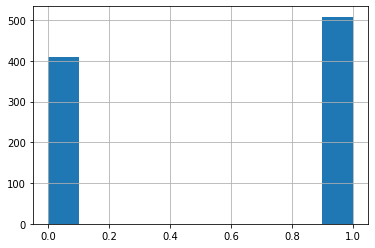

In [6]:
### Lets check for distribution of Heart Disease
df.HeartDisease.hist();

In [7]:
# Categorical feature
cat_feat = df.select_dtypes(include='object')
display(cat_feat.head())

## Numerical Feature
n_feat = df.select_dtypes(include='int64')
print(n_feat.head())

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


   Age  RestingBP  Cholesterol  FastingBS  MaxHR  HeartDisease
0   40        140          289          0    172             0
1   49        160          180          0    156             1
2   37        130          283          0     98             0
3   48        138          214          0    108             1
4   54        150          195          0    122             0


In [8]:
for i in cat_feat:
    print(i,':> No of Unique Values : ', df[i].unique(),'\n')

Sex :> No of Unique Values :  ['M' 'F'] 

ChestPainType :> No of Unique Values :  ['ATA' 'NAP' 'ASY' 'TA'] 

RestingECG :> No of Unique Values :  ['Normal' 'ST' 'LVH'] 

ExerciseAngina :> No of Unique Values :  ['N' 'Y'] 

ST_Slope :> No of Unique Values :  ['Up' 'Flat' 'Down'] 



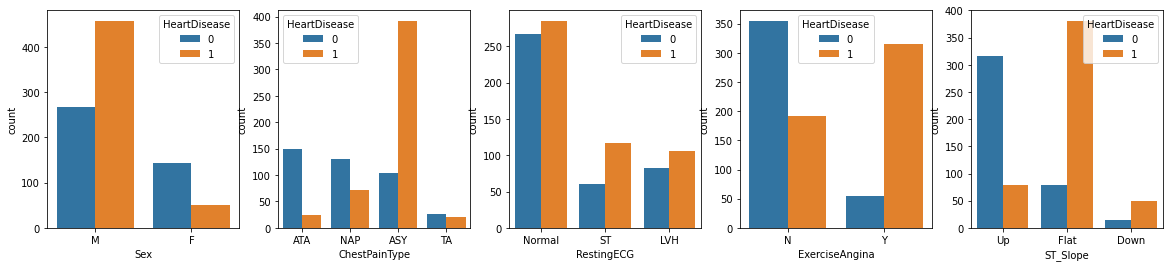

In [9]:
plt.figure(figsize=(20,4))
j=1
for i in cat_feat:
    plt.subplot(1,5,j)
    sns.countplot(x= df[i], data= df,hue='HeartDisease' )
    j=j+1
plt.show()

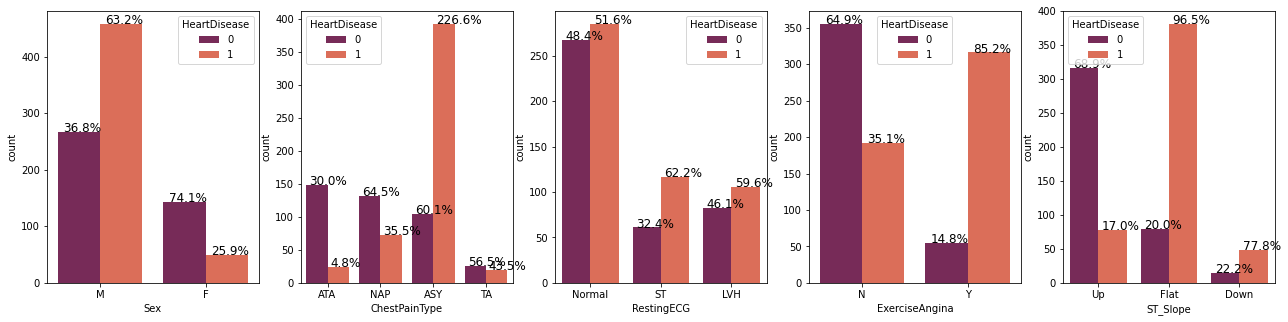

In [10]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    #plt.show()


plt.figure(figsize=(22,5))
j=1
for i in cat_feat:
    plt.subplot(1,5,j)
    ax= sns.countplot(x= df[i], data= df,hue='HeartDisease', palette='rocket' )
    n= df[i].nunique()
    with_hue(ax,df[i],n,2)
    j=j+1
plt.show()

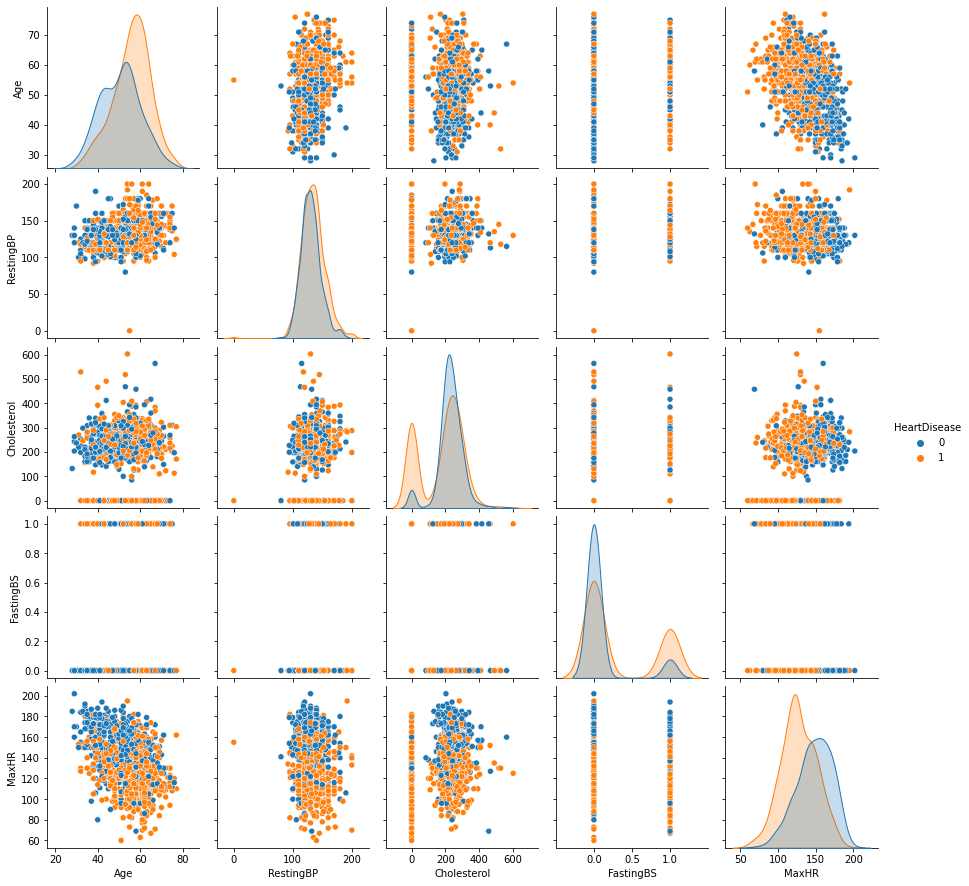

In [11]:
sns.pairplot(n_feat, hue='HeartDisease');

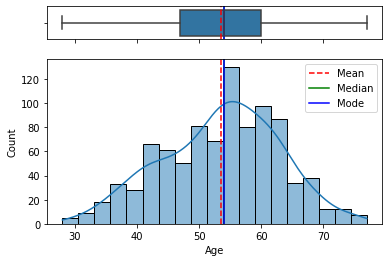

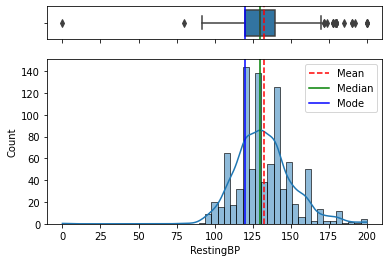

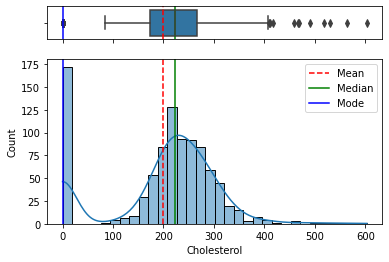

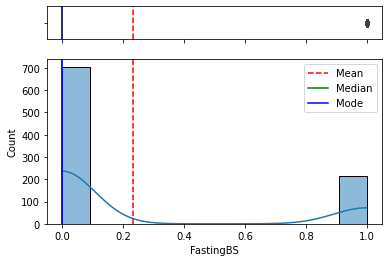

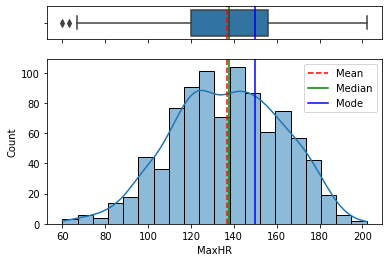

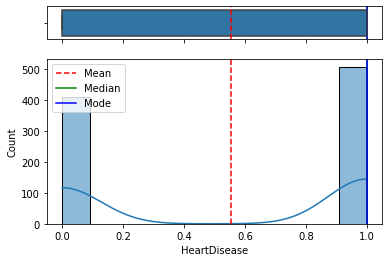

In [12]:
### Checking for outliers and histogram of numerical data

j=1
for i in n_feat:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    mean=df[i].mean()
    median=df[i].median()
    mode=df[i].mode().values[0]

    sns.boxplot(data=df, x=i, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')

    sns.histplot(data=df, x=i, ax=ax_hist, kde=True)
    ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
    ax_hist.axvline(median, color='g', linestyle='-', label="Median")
    ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

    ax_hist.legend()

    ax_box.set(xlabel='')
    plt.show()

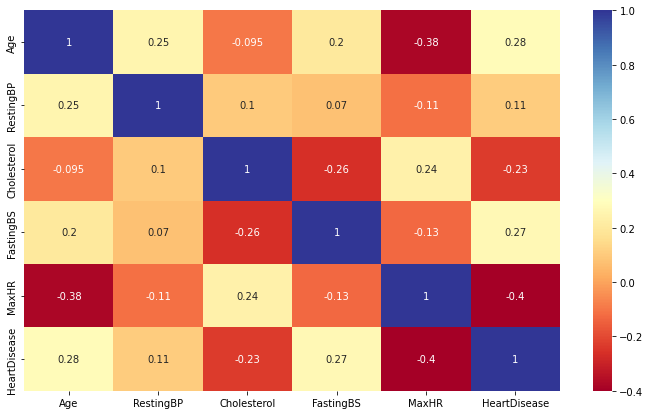

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(n_feat.corr(), annot=True, cmap='RdYlBu');

In [14]:
# Creating training and test dataset to check for overfitting
df_train= df.iloc[1:750]
df_test = df.loc[750:]
display(df_train.head(3))
print()
display(df_test.head(3))

test_validation = df_test['HeartDisease']
test_extra = df_test.drop('HeartDisease', axis=1)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
750,46,F,NAP,142,177,0,LVH,160,Y,1.4,Down,0
751,67,F,NAP,152,277,0,Normal,172,N,0.0,Up,0
752,56,M,ASY,125,249,1,LVH,144,Y,1.2,Flat,1


# One Hot Encoding

In [15]:
def encoder(df):
    z=pd.DataFrame()
    for i in cat_feat:
        df1=pd.get_dummies(df[i],drop_first=True)
        z=pd.concat([df1,z],axis=1)
    for j in n_feat:
        df1=df[j]
        z=pd.concat([df1,z],axis=1)
    return(z)

In [16]:
train = encoder(df_train)
train

,HeartDisease,MaxHR,FastingBS,Cholesterol,RestingBP,Age,Flat,Up,Y,Normal,ST,ATA,NAP,TA,M
1,1,156,0,180,160,49,1,0,0,1,0,0,1,0,0
2,0,98,0,283,130,37,0,1,0,0,1,1,0,0,1
3,1,108,0,214,138,48,1,0,1,1,0,0,0,0,0
4,0,122,0,195,150,54,0,1,0,1,0,0,1,0,1
5,0,170,0,339,120,39,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1,169,0,269,108,63,1,0,1,1,0,0,0,0,0
746,1,132,0,212,112,66,0,1,1,0,0,0,0,0,1
747,0,178,0,226,140,42,0,1,0,1,0,0,0,0,1
748,1,96,0,246,120,64,0,0,1,0,0,0,0,0,1


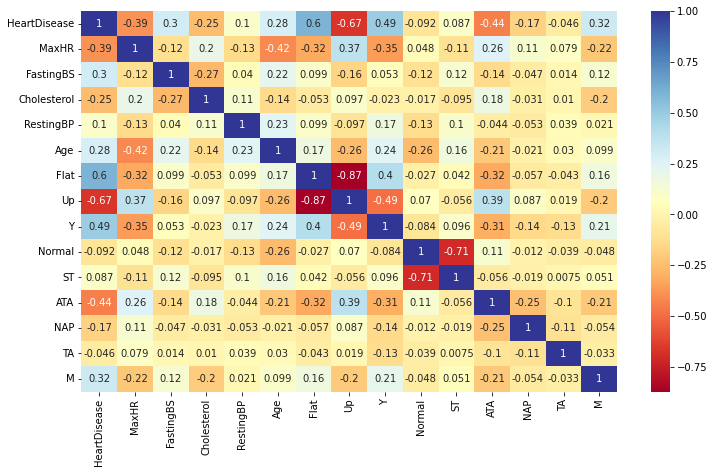

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(train.corr(), annot=True, cmap='RdYlBu');

# Spliting the training dataset


In [18]:
y=train['HeartDisease']
x=train.drop('HeartDisease', axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

# standardize
### Q. What is data standardization exactly?
Data standardization is about making sure that data is internally consistent; that is, each data type has the same content and format.
Standardized values are useful for tracking data that isn’t easy to compare otherwise.

In [20]:
from sklearn.preprocessing import StandardScaler
'''sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)'''

'sc = StandardScaler()\nx_train = sc.fit_transform(x_train)\nx_test = sc.transform(x_test)'

# Model Comparison
1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

# Creating Pipeline

In [22]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [23]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression(random_state=7))])

pipeline_knn=Pipeline([('scalar2',StandardScaler()),
                     ('knn_classifier',KNeighborsClassifier())])

pipeline_svc=Pipeline([('scalar3',StandardScaler()),
                     ('svc_classifier',SVC(random_state=7))])

pipeline_nb =Pipeline([('scalar4',StandardScaler()),
                     ('nb_classifier',GaussianNB())])

pipeline_dt=Pipeline([('scalar5',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier())])

pipeline_randomforest=Pipeline([('scalar6',StandardScaler()),
                     ('rf_classifier',RandomForestClassifier())])

pipeline_xgb = Pipeline([('scalar7', StandardScaler()),
                 ('xgb_classifier', XGBClassifier(boosting_type='gbdt',max_depth=6,min_child_weight = 1, learning_rate=0.1 ))])

pipeline_cbc = Pipeline([('scalar8', StandardScaler()),
                 ('cbc_classifier', CatBoostClassifier(iterations=520, learning_rate=0.1))])

pipeline_lgbm = Pipeline([('scalar9', StandardScaler()),
                 ('lgbm_classifier', lgb.LGBMClassifier(boosting_type='gbdt',min_child_samples=20,
                                                        min_child_weight=0.001,iterations=50, learning_rate=0.1))])

In [24]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_knn,pipeline_svc, pipeline_nb, pipeline_dt, pipeline_randomforest, pipeline_xgb,
            pipeline_cbc,pipeline_lgbm]

In [25]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [26]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'KNN', 2: 'SVC', 3: 'NB', 4:'dt', 5:'RF',6:'XGB',7:'CB', 8:'LGBM'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

[17:50:18] WARNING: ../src/learner.cc:573: 
Parameters: { "boosting_type" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:50:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6050203	total: 61.7ms	remaining: 32s
1:	learn: 0.5429030	total: 62.9ms	remaining: 16.3s
2:	learn: 0.5015335	total: 64.4ms	remaining: 11.1s
3:	learn: 0.4589563	total: 66ms	remaining: 8.52s
4:	learn: 0.4232314	total: 67.5ms	remaining: 6.95s
5:	learn: 0.3899303	total: 69.1ms	remaining: 5.92s
6:	learn: 0.3698763	total: 70.5ms	remaining: 5.17s
7:	learn: 0.3508951	total: 71.6ms	remaining: 4.58s
8:	learn:

In [27]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))
                                


Logistic Regression Test Accuracy: 0.86
KNN Test Accuracy: 0.8533333333333334
SVC Test Accuracy: 0.84
NB Test Accuracy: 0.8666666666666667
dt Test Accuracy: 0.7733333333333333
RF Test Accuracy: 0.8466666666666667
XGB Test Accuracy: 0.8333333333333334
CB Test Accuracy: 0.8333333333333334
LGBM Test Accuracy: 0.86


In [28]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:NB


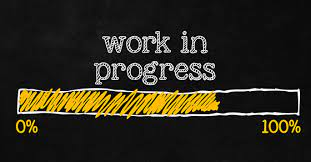

#### Plot graph with percentage

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
  



def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
ax = sns.countplot(x= 'ChestPainType', data= df,hue='HeartDisease' )

with_hue(ax,df['ChestPainType'], 4,2)


[Source](https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn)